<a href="https://colab.research.google.com/github/kevink1103/pytorch_rookie/blob/master/Chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch

In [0]:
A = torch.tensor([1, 2, 3.], requires_grad=True)

In [0]:
B = torch.randn(10, 3)

In [0]:
C = torch.mv(B, A)

In [0]:
print(C)

tensor([ 3.6534,  2.9919, -5.2829,  6.0215,  0.1412, -4.5884,  3.8932, -3.5019,
         4.9932,  1.2640], grad_fn=<MvBackward>)


In [0]:
o = C.sum(0)
print(o)

tensor(9.5853, grad_fn=<SumBackward1>)


In [0]:
o.backward()
print(o)

tensor(9.5853, grad_fn=<SumBackward1>)


In [0]:
A.grad

tensor([-4.5695,  1.3941,  3.7889])

# 리스트 2.1
테스트 데이터 생성 및 파라미터 학습을 위한 변수 정의  
y = 1 + 2x_1 + 3x_2

In [0]:
# 참(true)의 계수
w_true = torch.Tensor([1, 2, 3])

# X 데이터 준비. 절편을 회귀 계수에 포함시키기 위해
# X의 최초 차원에 1을 추가해 둔다
# 매트릭스 디멘션 맞추기 위해서 맨 앞에 1 추가. 1x1
# 매트릭스 곱하기 연산을 통해 결국 y식 완성
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)], 1)
print(X[:5])

# 참의 계수와 각 X의 내적을 행렬과 벡터의 곱으로 모아서 계산
y = torch.mv(X, w_true) + torch.randn(100) * 0.5
print(y)

tensor([[ 1.0000, -1.3230, -0.3778],
        [ 1.0000, -0.1146,  1.7756],
        [ 1.0000, -0.5874, -0.1779],
        [ 1.0000, -0.0262,  0.1770],
        [ 1.0000,  0.5970,  0.4585]])
tensor([-3.0875,  6.0755, -0.3873,  1.1562,  3.7757, -1.5284,  4.0793,  7.9474,
         1.4052,  3.5256,  2.3525, -2.0652, -0.9138,  0.2932,  3.3269,  2.4682,
         2.3663,  6.4222,  0.6383, -9.6605,  2.1091,  2.9885,  6.8806, -4.2116,
        -1.2455,  3.8676,  0.1311,  0.7098,  0.9807,  2.0369, -0.0395, -1.5376,
         2.7519, -4.5991,  1.4588, -2.5435, -4.1801,  2.7670, -1.3907, -0.9760,
        -5.2061,  2.5122, -1.4771,  4.1532,  3.6694, -8.3159,  1.7684, -0.4728,
         3.6207,  0.8495, -4.0868,  5.2353,  0.5733,  0.2006,  7.9582,  5.8541,
        -1.6635,  6.0514, -1.3912, -2.9893,  0.7930, -2.1824, -8.5599,  2.8427,
        -4.0649,  1.6423,  3.5208,  2.2493, -0.7580,  1.1441,  3.7124, -0.1486,
         2.9248,  4.5300,  2.4863,  5.2237,  0.5925, -2.7793, -0.4919,  3.1542,
         0.413

In [0]:
# 기울기 하강으로 최적화하기 위해 파라미터 Tensor를
# 난수로 초기화해서 생성
w = torch.randn(3, requires_grad=True)

# 학습률
gamma = 0.1

# 리스트 2.2
경사 하강법으로 파라미터 최적화

In [0]:
# 손실 함수의 로그
losses = []

# 100회 반복
for _ in range(100):
  # 전회의 backward 메서드로 계산된 경사값을 초기화
  w.grad = None
  
  # 선형 모델로 y 예측값을 계산
  y_pred = torch.mv(X, w)
  
  # MSE loss와 w에 의한 미분을 계산
  loss = torch.mean((y - y_pred) ** 2)
  loss.backward()
  
  # 경사를 갱신한다
  # w를 그대로 대입해서 갱신하면 다른 텐서가 돼서
  # 계산 그래프가 망가진다. 따라서 data만 갱신한다
  w.data = w.data - gamma * w.grad.data
  
  # 수렴 확인을 위한 loss를 기록해 둔다
  losses.append(loss.item())

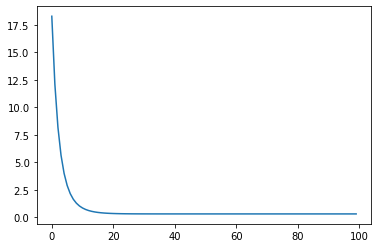

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

# 리스트 2.3
회귀 계수의 확인

In [0]:
w

tensor([1.0313, 2.0809, 3.0753], requires_grad=True)

In [0]:
# 잘 찾았다!!!

# 리스트 2.5
선형 회귀 모델의 구축과 최적화 준비

In [0]:
from torch import nn, optim

In [0]:
# Linear층을 작성. 이번에는 절편은 회귀 계수에 포함하므로
# 입력 차원을 3으로 하고 bias(절편)을 False로 한다
net = nn.Linear(in_features=3, out_features=1, bias=False)

In [0]:
# SGD의 최적화기상에서 정의한 네트워크의
# 파라미터를 전달해서 최적화
optimizer = optim.SGD(net.parameters(), lr=0.1)

In [0]:
# MSE loss 클래스
loss_fn = nn.MSELoss()

# 리스트 2.6
최적화 루프(반복 루프) 돌리기

In [0]:
# 손실 함수 로그
losses = []

# 100회 반복
for _ in range(100):
  # 전회의 backward 메서드로 계산된 경사값을 초기화
  optimizer.zero_grad()
  
  # 선형 모델로 y 예측값을 계산
  y_pred = net(X)
  
  # MSE loss 계산
  # y_pred는 (n,1)과 같은 shape를 지니고 있으므로 (n,)으로 변경할 필요가 있다
  loss = loss_fn(y_pred.view_as(y), y)
  
  # loss의 w를 사용한 미분 계산
  loss.backward()
  
  # 경사를 갱신한다
  optimizer.step()
  
  # 수렴 확인을 위한 loss를 기록해 둔다
  losses.append(loss.item())

# 리스트 2.7
수렴한 모델의 파라미터 확인

In [0]:
list(net.parameters())

[Parameter containing:
 tensor([[1.0313, 2.0809, 3.0753]], requires_grad=True)]

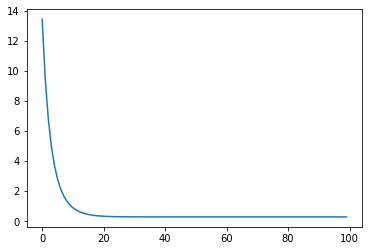

In [0]:
plt.plot(losses)

# 리스트 2.8
iris 데이터 준비

In [0]:
import torch
from torch import nn, optim
from sklearn.datasets import load_iris
iris = load_iris()

In [0]:
# iris는 (0,1,2)의 세 가지 종류를 분류하는 문제이므로
# (0,1)의 두 개 데이터만 사용한다
# 원래는 학습용과 테스트용으로 나누어야 하지만 여기선 생략한다
X = iris.data[:100]
y = iris.target[:100]

# NumPy의 ndarray를 PyTorch의 Tensor로 변환
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# 리스트 2.9
모델 작성

In [0]:
# iris 데이터는 4차원
net = nn.Linear(4, 1)

# 시그모이드 함수를 적용해서 두 클래스의 분류를 위한
# 크로스 엔트로피를 계산
loss_fn = nn.BCEWithLogitsLoss()

# SGD (약간 큰 학습률)
optimizer = optim.SGD(net.parameters(), lr=0.25)

# 리스트 2.10
파라미터 최적화를 위한 반복 루프

In [0]:
# 손실 함수 로그
losses = []

# 100회 반복
for _ in range(100):
  # 전회의 backward 메서드로 계산된 경사값을 초기화
  optimizer.zero_grad()
  
  # 선형 모델으로 y 예측값을 계산
  y_pred = net(X)
  
  # MSE loss를 사용한 미분 계산
  loss = loss_fn(y_pred.view_as(y), y)
  loss.backward()
  
  # 경사를 갱신한다
  optimizer.step()
  
  # 수렴 확인을 위한 loss를 기록해 둔다
  losses.append(loss.item())

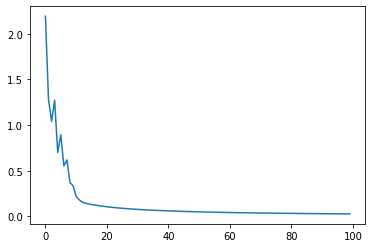

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(losses)

# 리스트 2.11
모델 작성

In [0]:
# 선형 결합의 결과
h = net(X)

# 시그모이드 함수를 적용한 결과는 y=1의 확률을 보여 준다
prob = torch.sigmoid(h)

# 확률이 0.5이상인 것을 클래스1로 예측하고 그외는 0으로 한다
# PyTorch에는 Bool형이 없으므로 ByteTensor가 출력된다
y_pred = prob > 0.5

# 예측 결과 확인 (y는 FloatTensor이므로 ByteTensor로 변환한 후에 비교)
(y.byte() == y_pred.view_as(y)).sum().item()

print(prob.size())
print(y.size())
print(y.byte())
print(y_pred.size())
print(y_pred.view_as(y))
print(y_pred.view_as(y).byte())
print((y.byte() == y_pred.view_as(y)).sum().item())

# all correct

torch.Size([100, 1])
torch.Size([100])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1], dtype=torch.uint8)
torch.Size([100, 1])
tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True

# 리스트 2.12
손으로 쓴 10개의 숫자 데이터를 분류하는 문제

In [0]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data
y = digits.target

In [0]:
X = torch.tensor(X, dtype=torch.float32)
# CrossEntropyLoss 함수는 y로 int64형의 텐서를 받으니 주의하자
y = torch.tensor(y, dtype=torch.int64)

In [0]:
# 출력은 10(분류 수) 차원
net = nn.Linear(X.size()[1], 10)

# 소프트맥스 크로스 엔트로피
loss_fn = nn.CrossEntropyLoss()

# SGD
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 리스트 2.13
학습용 반복 처리

In [0]:
# 손실 함수 로그
losses = []

# 100회 반복
for _ in range(100):
  # 전회의 backward 메서드로 계산된 경사값을 초기화
  optimizer.zero_grad()
  
  # 선형 모델으로 y 예측값을 계산
  y_pred = net(X)
  
  # MSE loss 미분 계산
  loss = loss_fn(y_pred, y)
  loss.backward()
  
  # 경사를 갱신한다
  optimizer.step()
  
  # 수렴 확인을 위한 loss를 기록해 둔다
  losses.append(loss.item())

# 리스트 2.14
정답률

In [0]:
# torch.max는 집계축을 지정하면 최댓값뿐만 아니라 그 위치도 반환한다
_, y_pred = torch.max(net(X), 1)

# 정답률을 계산한다
(y_pred == y).sum().item() / len(y)

0.9476905954368392